# Late Fusion Transformer Model - CMU-MOSI Dataset

In this notebook, we implement the Late Fusion Transformer Model, and test it on CMU-MOSI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import Transformer, MLP
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import Concat
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosi_data.pkl', robust_test=False)

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
encoders = [Transformer(20, 40).to(device),
            Transformer(5, 10).to(device),
            Transformer(300, 600).to(device)]
head = MLP(650, 256, 1).to(device)

/home/rrm9598/.local/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [6]:
fusion = Concat().to(device)

## Training

In [7]:
FILE_NAME = 'mosi_lft_r0'

In [8]:
train_losses, valid_losses = train(
    encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
    early_stop=True, is_packed=True, lr=1e-4, save=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt', 
    weight_decay=0.01, objective=torch.nn.L1Loss()
)

Epoch [1/100]
Train Loss: 1.2046
Valid Loss: 1.3392
Saving Best

Epoch [2/100]
Train Loss: 0.9976
Valid Loss: 1.0462
Saving Best

Epoch [3/100]
Train Loss: 0.8116
Valid Loss: 0.9563
Saving Best

Epoch [4/100]
Train Loss: 0.7615
Valid Loss: 1.0203

Epoch [5/100]
Train Loss: 0.7192
Valid Loss: 0.9826

Epoch [6/100]
Train Loss: 0.6635
Valid Loss: 0.9545
Saving Best

Epoch [7/100]
Train Loss: 0.6115
Valid Loss: 0.9315
Saving Best

Epoch [8/100]
Train Loss: 0.5981
Valid Loss: 0.9763

Epoch [9/100]
Train Loss: 0.5732
Valid Loss: 0.9375

Epoch [10/100]
Train Loss: 0.5613
Valid Loss: 0.9023
Saving Best

Epoch [11/100]
Train Loss: 0.5275
Valid Loss: 0.9722

Epoch [12/100]
Train Loss: 0.4832
Valid Loss: 0.8990
Saving Best

Epoch [13/100]
Train Loss: 0.4510
Valid Loss: 0.9687

Epoch [14/100]
Train Loss: 0.4247
Valid Loss: 0.9666

Epoch [15/100]
Train Loss: 0.4338
Valid Loss: 0.9222

Epoch [16/100]
Train Loss: 0.4051
Valid Loss: 0.8861
Saving Best

Epoch [17/100]
Train Loss: 0.4095
Valid Loss: 0.8

Text(0.5, 1.0, 'Loss vs. No. of epochs')

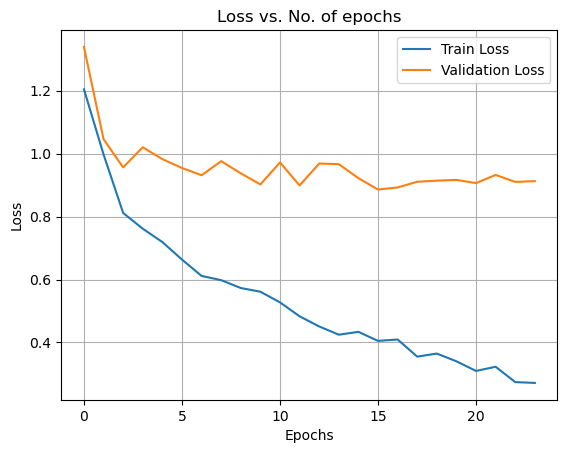

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/results/{FILE_NAME}.pkl')

## Testing

In [11]:
model = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt').to(device)

test(model, test_dataloaders_all=testdata, dataset='mosi', is_packed=True,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 75.6098% | Total Accuracy: 74.3440%
Inference Time: 799ms
Inference Params: 20953733
